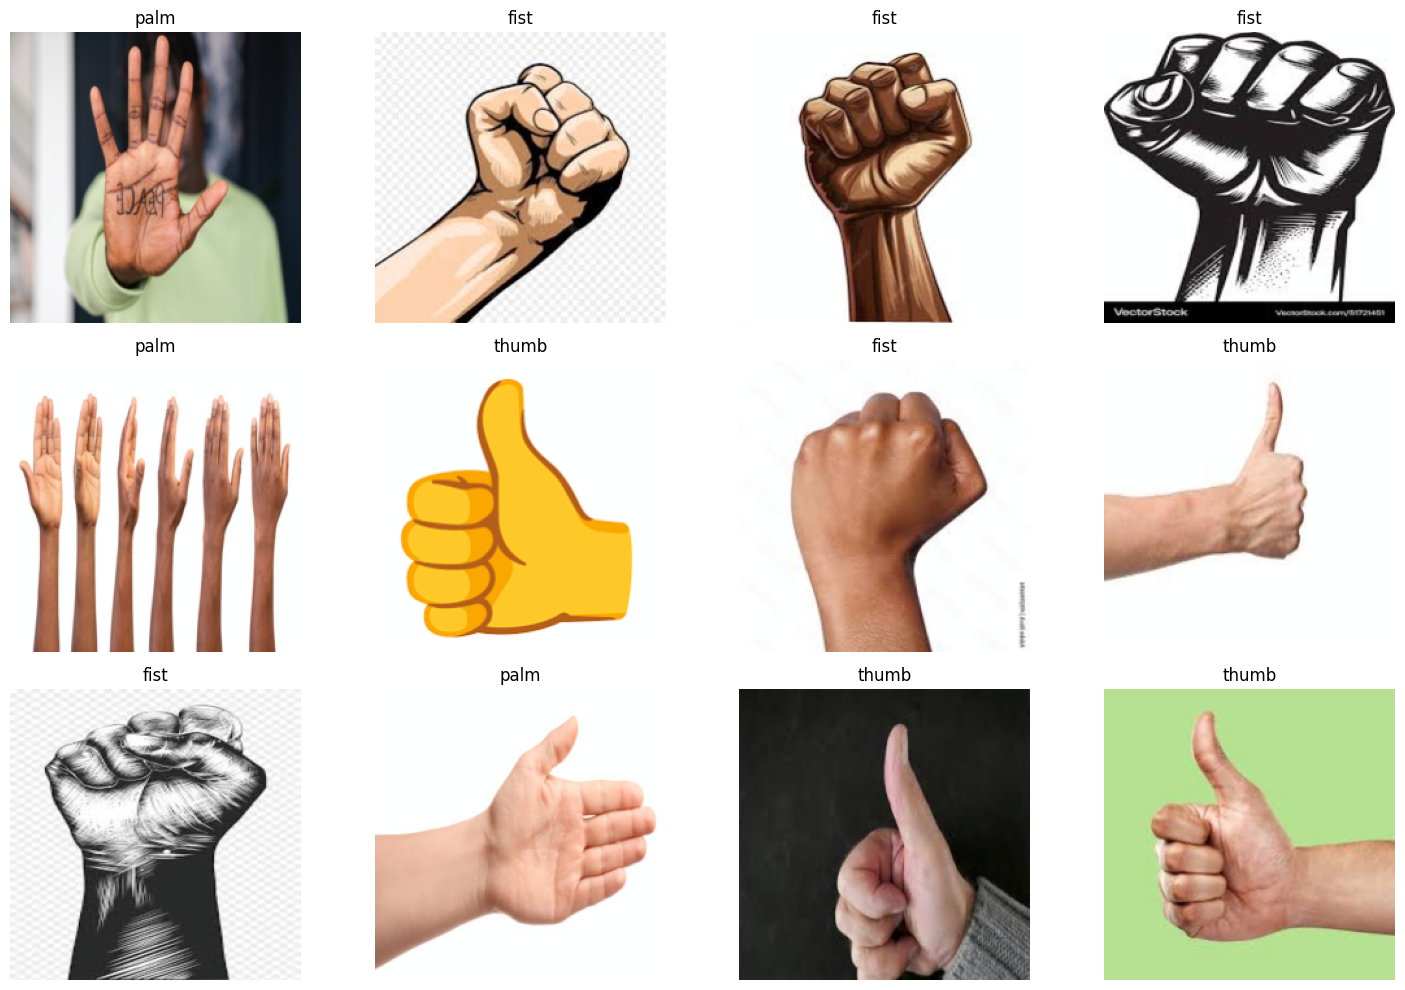

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from train import get_loaders # On réutilise ta fonction de chargement

# 1. Charger les données
train_loader, _ = get_loaders("./data")
images, labels = next(iter(train_loader))
classes = ['fist', 'palm', 'thumb']

# 3. Afficher les 12 premières images du lot
fig, axes = plt.subplots(3, 4, figsize=(15, 10)) # Grille de 3x4 = 12 images
axes = axes.flatten()

for i in range(12):
    # Dé-normalisation précise pour ResNet (ImageNet)
    img = images[i].numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean
    img = np.clip(img, 0, 1) # Force les valeurs entre 0 et 1 pour l'affichage
    
    # On utilise axes[i] pour dessiner dans la bonne case
    axes[i].imshow(img)
    axes[i].set_title(classes[labels[i]]) # Affiche le nom du geste (fist, palm, thumb)
    axes[i].axis('off') # Cache les axes x et y pour faire propre

plt.tight_layout() # Évite que les titres se chevauchent
plt.show()